In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('datas/housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data['mainroad'] = data['mainroad'].map({'yes' : 1, 'no' : 0})
data['guestroom'] = data['guestroom'].map({'yes' : 1, 'no' : 0})
data['basement'] = data['basement'].map({'yes' : 1, 'no' : 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes' : 1, 'no' : 0})
data['airconditioning'] = data['airconditioning'].map({'yes' : 1, 'no' : 0})
data['prefarea'] = data['prefarea'].map({'yes' : 1, 'no' : 0})

In [5]:
status = pd.get_dummies(data['furnishingstatus'], drop_first = True)

In [6]:
housing = pd.concat([data, status], axis = 1)

In [7]:
data.drop(['furnishingstatus'], axis = 1, inplace = True)

In [8]:
# Creating a new variable

In [9]:
data['areaperbedrooms'] = data['area']/data['bedrooms']

In [10]:
data['bbratio'] = data['bedrooms']/data['bathrooms']

In [11]:
# Recalling the Features

In [12]:
def normalise (x):
    return ( (x-np.min(x))/ (max(x) - min(x)))

data = data.apply(normalise)

In [13]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,areaperbedrooms,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.237016,0.2
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.298923,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.472584,0.1
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.240232,0.2
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.237016,0.6


In [14]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'areaperbedrooms', 'bbratio']]

y = data[['price']]

In [15]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
# RFE

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()
rfe = RFE(lm, 9)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True False  True  True False False  True False  True  True  True  True
  True]
[1 4 1 1 5 3 1 2 1 1 1 1 1]


In [19]:
col = X_train.columns[rfe.support_]

In [20]:
# Building the Model using Sklearn

In [21]:
X_train_rfe = X_train[col]

In [22]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
lm = sm.OLS(X_train_rfe, y_train).fit()

In [25]:
print(lm.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000017E03F61808>>


In [26]:
# Making Predictions

In [35]:
X_test_rfe = sm.add_constant(X_test_rfe)
y_pred = lm.predict(X_test_rfe)

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


ValueError: shapes (381,10) and (1,10) not aligned: 10 (dim 1) != 1 (dim 0)

In [28]:
# Model Evaluation

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ValueError: x and y must have same first dimension, but have shapes (164,) and (381, 1)

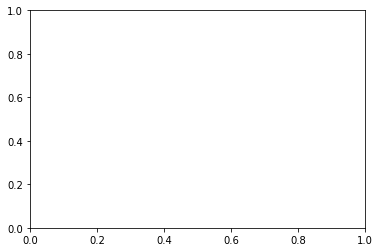

In [33]:
import matplotlib.pyplot as plt
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c, y_test, color = "blue", linewidth = 2.5, linestyle = "-")
plt.plot(c, y_pred, color = "red", linewidth = 2.5, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Housing Price', fontsize = 16)

In [36]:
c = [i for i in range(1, 165, 1)]
fig = plt.figure()
plt.plot(c, y_test - y_pred, color = "blue", linewidth = 2.5, linestyle = '-')
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('ytest-ypred', fontsize = 16)

NameError: name 'y_pred' is not defined

<Figure size 432x288 with 0 Axes>